In [14]:
import pandas as pd #untuk mengolah data bentuk matrix dan vektor
import numpy as np #untuk mengolah data yang lebih terstruktur, spt dataset tabular yg memiliki baris dan kolom

from sklearn.model_selection import train_test_split #untuk membagi dataset menjadi data training dan data test
from sklearn.naive_bayes import GaussianNB #untuk membuat model klasifikasi menggunakan algoritma Naive Bayes
from sklearn.metrics import confusion_matrix #untuk menghitung confusion matrix label sebenarnya dan label prediksi
from sklearn.metrics import classification_report #untuk menghitung classification report 
from sklearn.metrics import accuracy_score #untuk membuat tingkat acurracy

In [15]:
#untuk membaca dataset dan menampilkan 5 baris pertama pada dataset
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
#menampilkan jumlah baris dari dataset
print(len(df))

303


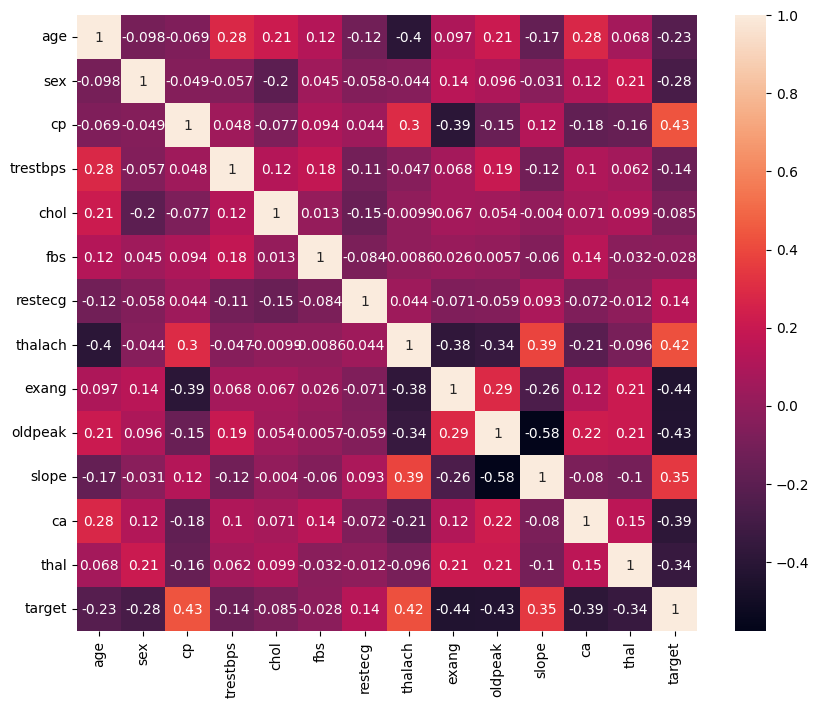

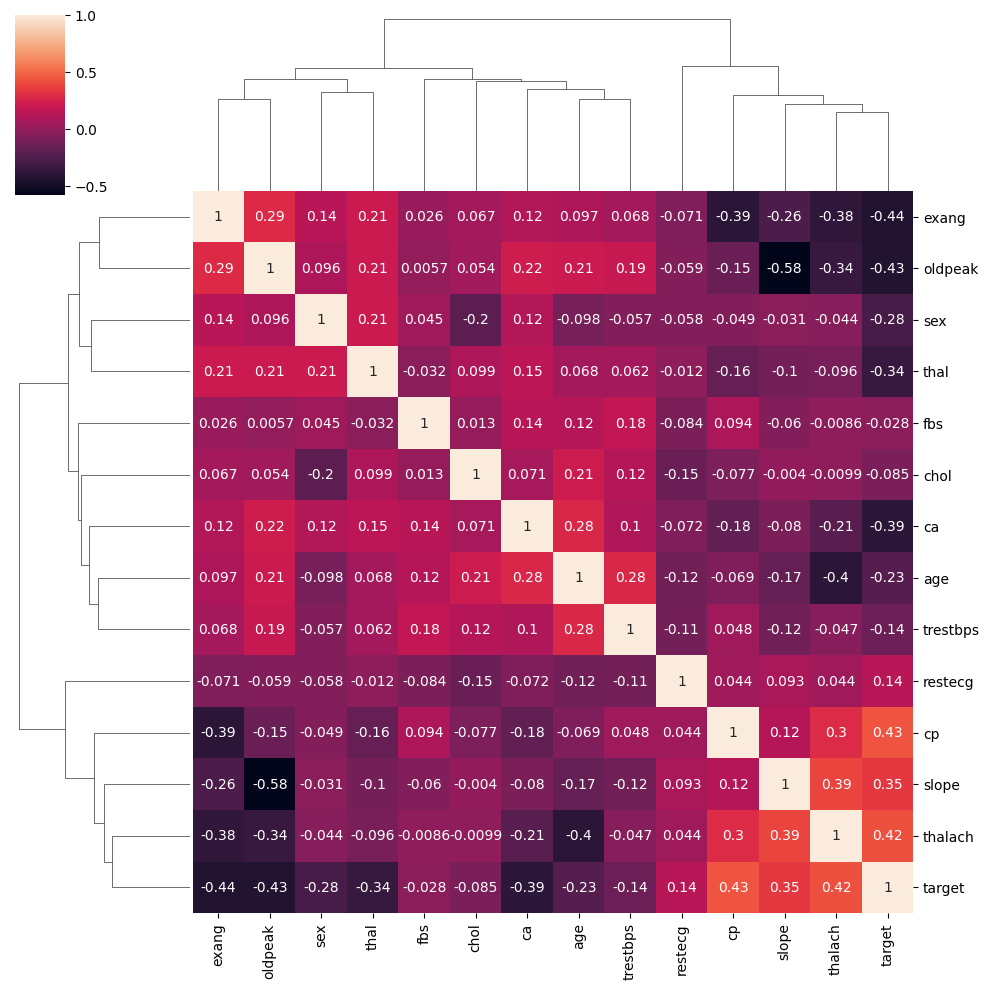

In [17]:
import seaborn as sns #untuk membuat visualisasi data
import matplotlib.pyplot as plt  # Matplotlib digunakan untuk mengatur ukuran gambar

# menghitung matriks korelasi antara semua fitur dalam dataframe
correlations = df.corr()

# Tentukan ukuran gambar
plt.figure(figsize=(10, 8))  # Ubah angka untuk lebar dan tinggi yang diinginkan

# membuat heatmap dari matrix korelasi sebelumnya
sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)

# membuat clustermap dari matrix korelasi sebelumnya
sns.clustermap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)

In [18]:
# untuk membuat variabel x yang berisi data dari DataFrame df, namun tanpa kolom-kolom yang disebutkan dalam metode drop.
x = df.drop(["target", "thalach","slope"], axis = 1)

# untuk membuat variabel y yang berisi data dari kolom "target" dalam DataFrame df
y = df["target"]

In [19]:
#untuk membagi dataset menjadi empat subset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()

# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(x_train, y_train)

In [20]:
# Menentukan hasil prediksi dari x_test
y_pred = nbtrain.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [21]:
#untuk mengonversi variabel y_test 
np.array(y_test)

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [22]:
# Menentukan probabilitas hasil prediksi
nbtrain.predict_proba(x_test)

array([[8.42880121e-04, 9.99157120e-01],
       [9.98699096e-01, 1.30090444e-03],
       [9.95096658e-01, 4.90334243e-03],
       [9.99918148e-01, 8.18516306e-05],
       [1.40139928e-03, 9.98598601e-01],
       [9.99891992e-01, 1.08008139e-04],
       [4.17720945e-02, 9.58227906e-01],
       [6.17504466e-01, 3.82495534e-01],
       [3.14412420e-03, 9.96855876e-01],
       [8.95748137e-01, 1.04251863e-01],
       [9.90502874e-01, 9.49712580e-03],
       [5.62684739e-01, 4.37315261e-01],
       [9.99999902e-01, 9.75683822e-08],
       [9.99982128e-01, 1.78722026e-05],
       [5.75640531e-01, 4.24359469e-01],
       [1.00000000e+00, 2.25566170e-10],
       [5.85874268e-01, 4.14125732e-01],
       [9.85388155e-01, 1.46118449e-02],
       [8.22243820e-01, 1.77756180e-01],
       [3.88159279e-02, 9.61184072e-01],
       [3.91487859e-01, 6.08512141e-01],
       [9.93122749e-01, 6.87725052e-03],
       [2.07235002e-04, 9.99792765e-01],
       [9.69776830e-01, 3.02231698e-02],
       [9.822771

In [23]:
#untuk menghitung confusion matrix berdasarkan label sebenarnya
confusion_matrix(y_test, y_pred)

array([[25,  5],
       [ 8, 23]], dtype=int64)

In [24]:
#untuk menghasilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        30
           1       0.82      0.74      0.78        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [25]:
#untuk menghitung tingkat akurasi (accuracy) dari model klasifikasi. Kemudian, nilai akurasi tersebut dicetak dalam bentuk persentase
akurasi = accuracy_score(y_test,y_pred)
print("Tingkat Akurasi : %d persen"%(akurasi*100))

Tingkat Akurasi : 78 persen
